In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import Risk_Kit as erk
import numpy as np
import pandas as pd

ind = erk.get_ind_returns()
er = erk.annualized_rets(ind["1996":"2000"],12)
cov = ind["1996":"2000"].cov()

In [3]:
from scipy.optimize import minimize

def msr(riskfree_rate, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.00),)*n

    weights_sum_to_1 = {
        'type':'eq',
        'fun':lambda weights:np.sum(weights) -1
    }
    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    results = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov), method="SLSQP",
                       options={'disp':False},
                       constraints=(weights_sum_to_1),
                       bounds=bounds
                      )    
    return results.x


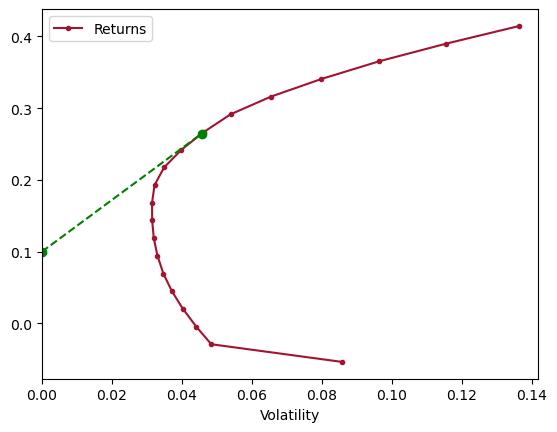

In [4]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim( left = 0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)

cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

<AxesSubplot:xlabel='Volatility'>

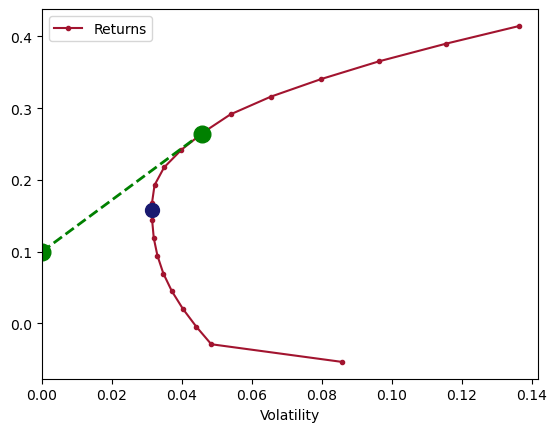

In [5]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_gmv=True)